# Kyle Demers
## Midterm Project Proposal

### Links to Data
Movies on different streaming services, <https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney>

streaming platforms revenue and user info, <https://www.kaggle.com/datasets/azminetoushikwasi/ott-video-streaming-platforms-revenue-and-users?resource=download>

In [1]:
#import modules
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in csvs
contentspend = pd.read_csv('ContentSpend.csv')
numsubscribers = pd.read_csv('NumSubscribers.csv')
numsubsbyregion = pd.read_csv('NumSubscribersByRegion.csv')
profit = pd.read_csv('Profit.csv')
revenue = pd.read_csv('Revenue.csv')
regionrev = pd.read_csv('RevenueByRegion.csv')
movies = pd.read_csv('MoviesOnStreamingPlatforms.csv')

In [3]:
#connect to db
conn = sqlite3.connect('stream.db')
curs= conn.cursor
#contentspend.to_sql('content_spend',conn, index = False)

---

# Main Targets

 **__Main Point: How has Netflix/Hulu adapted over time to stay profitable?__**
 **Explain by looking at**
 - Target Audience
 - Number of Subscribers
 - Revenue Per Subscriber
 - Amount of Subscribers
 
**What impact has content spend had on:**
 - Revenue
 - Subscribers
 
**and where has that content spend been primarily issued(what target audience)?**

---

# The Data

## Step 1
See what is in each table

---

#### Content spend

In [4]:
pd.read_sql('''
SELECT *
FROM content_spend
;''',conn)

,Year,Content spend
0,2016,6.88
1,2017,8.91
2,2018,12.00
3,2019,13.90
4,2020,11.80
5,2021,17.00


---

### Number of subscribers

In [5]:
#numsubscribers.to_sql('numsubs',conn,index = False)
pd.read_sql('''
SELECT *
FROM numsubs
;''',conn)

,Year,Subscribers
0,2011,21.5
1,2012,25.7
2,2013,35.6
3,2014,47.9
4,2015,62.7
5,2016,79.9
6,2017,99.0
7,2018,124.3
8,2019,151.5
9,2020,192.9


---

### Profit

In [6]:
#Profit.to_sql('Profit', conn, index = False)
pd.read_sql('''
SELECT * 
FROM Profit
;''', conn)

,Year,Profit
0,2012,0.050
1,2013,0.228
2,2014,0.403
3,2015,0.306
4,2016,0.379
5,2017,0.839
6,2018,1.600
7,2019,2.600
8,2020,4.500


---

### Revenue

In [7]:
#revenue.to_sql('revenue',conn,index = False)
pd.read_sql('''
SELECT *
FROM revenue
;''',conn)

,Year,Revenue
0,2011,3.1
1,2012,3.5
2,2013,4.3
3,2014,5.4
4,2015,6.7
5,2016,8.8
6,2017,11.6
7,2018,15.7
8,2019,20.1
9,2020,24.9


---

### Number of Subscribers by Region

In [8]:
#numsubsbyregion.to_sql('regionsub',conn,index = False)
pd.read_sql('''
SELECT *
FROM regionsub
;''',conn)

,Year,US & Canada,EMEA,Latin America,Asia-Pacific
0,2018,64.7,37.8,26.0,10.6
1,2019,67.6,51.7,31.4,16.2
2,2020,73.9,66.7,37.5,25.4


---

### Revenue By Region

In [9]:
#regionrev.to_sql('regeionrev',conn,index = False)
pd.read_sql('''
SELECT *
FROM regionrev
;''',conn)

,Year,US & Canada,EMEA,Latin America,Asia-Pacific
0,2018,8.28,3.95,2.22,0.94
1,2019,10.05,5.54,2.78,1.46
2,2020,11.45,7.77,3.13,2.37


---

### Working with movie data

In [10]:
#movies.to_sql('movies',conn,index = False)
movies = pd.read_sql('''
SELECT *
FROM movies
;''',conn)
movies

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,None,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,None,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,None,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,None,10/100,0,0,0,1,0


---

### Manipulating Data

In [12]:
movies['Age'].unique()

array(['18+', '7+', '13+', '16+', 'all', None], dtype=object)

In [13]:
#drop na rows
movies = movies[movies['Age'].notna()]
print(movies['Age'].unique())
#movies.to_sql('movie_na',conn,index = False)

['18+' '7+' '13+' '16+' 'all']


We need to get tables for each specific streaming service

In [248]:
netflix_age = pd.read_sql('''
SELECT Age
FROM movie_na
WHERE Netflix = 1
;''',conn)

In [249]:
Hulu_age = pd.read_sql('''
SELECT Age
FROM movie_na
WHERE Hulu = 1
;''',conn)

In [250]:
Prime_age = pd.read_sql('''
SELECT Age
FROM movie_na
WHERE [Prime Video] = 1
;''',conn)

In [251]:
Disney_age = pd.read_sql('''
SELECT Age
FROM movie_na
WHERE [Disney+] = 1
;''',conn)

## Step 2 - Join Data

### Get a table with information on money

In [18]:
#revenue.to_sql('revenue',conn,index = False)
money = pd.read_sql('''
SELECT ns.Year, Subscribers,[Content spend], Profit, Revenue
FROM numsubs ns
LEFT JOIN content_spend cs
ON ns.Year = cs.year
LEFT JOIN 
Profit p
ON p.Year = ns.Year
LEFT JOIN revenue r
on ns.year = r.year
;''',conn)
money

,Year,Subscribers,Content spend,Profit,Revenue
0,2011,21.5,NaN,NaN,3.1
1,2012,25.7,NaN,0.050,3.5
2,2013,35.6,NaN,0.228,4.3
3,2014,47.9,NaN,0.403,5.4
4,2015,62.7,NaN,0.306,6.7
5,2016,79.9,6.88,0.379,8.8
6,2017,99.0,8.91,0.839,11.6
7,2018,124.3,12.00,1.600,15.7
8,2019,151.5,13.90,2.600,20.1
9,2020,192.9,11.80,4.500,24.9


We can see revenue and subscribers both increasing, but we need a way to compare both of these

In [19]:
#money.to_sql('money',conn,index = False)

In [73]:
money2 = pd.read_sql('''
SELECT *, Revenue/Subscribers as RevPerSub
FROM money
GROUP BY Year
;''',conn)
money2

,Year,Subscribers,Content spend,Profit,Revenue,RevPerSub
0,2011,21.5,NaN,NaN,3.1,0.144186
1,2012,25.7,NaN,0.050,3.5,0.136187
2,2013,35.6,NaN,0.228,4.3,0.120787
3,2014,47.9,NaN,0.403,5.4,0.112735
4,2015,62.7,NaN,0.306,6.7,0.106858
5,2016,79.9,6.88,0.379,8.8,0.110138
6,2017,99.0,8.91,0.839,11.6,0.117172
7,2018,124.3,12.00,1.600,15.7,0.126307
8,2019,151.5,13.90,2.600,20.1,0.132673
9,2020,192.9,11.80,4.500,24.9,0.129082


It might be helpful to actual see the subscriber price

In [74]:
money2['SubPrice'] = [7.99,7.99,7.99,8.66,9.16,9.99,10.16, 10.99, 12.99,13.24]
money2

,Year,Subscribers,Content spend,Profit,Revenue,RevPerSub,SubPrice
0,2011,21.5,NaN,NaN,3.1,0.144186,7.99
1,2012,25.7,NaN,0.050,3.5,0.136187,7.99
2,2013,35.6,NaN,0.228,4.3,0.120787,7.99
3,2014,47.9,NaN,0.403,5.4,0.112735,8.66
4,2015,62.7,NaN,0.306,6.7,0.106858,9.16
5,2016,79.9,6.88,0.379,8.8,0.110138,9.99
6,2017,99.0,8.91,0.839,11.6,0.117172,10.16
7,2018,124.3,12.00,1.600,15.7,0.126307,10.99
8,2019,151.5,13.90,2.600,20.1,0.132673,12.99
9,2020,192.9,11.80,4.500,24.9,0.129082,13.24


---

### Step 3
Look at what's in this combined data set

In [75]:
#check for null values
money2.isnull().sum().sum()

6

In [76]:
#get some summary stats
#look for unusual data
money2.describe()

,Year,Subscribers,Content spend,Profit,Revenue,RevPerSub,SubPrice
count,10.00000,10.00000,5.000000,9.000000,10.000000,10.000000,10.00000
mean,2015.50000,84.10000,10.698000,1.211667,10.410000,0.123612,9.91600
std,3.02765,57.43195,2.781029,1.479648,7.551519,0.012160,1.97187
min,2011.00000,21.50000,6.880000,0.050000,3.100000,0.106858,7.99000
25%,2013.25000,38.67500,8.910000,0.306000,4.575000,0.113844,8.15750
50%,2015.50000,71.30000,11.800000,0.403000,7.750000,0.123547,9.57500
75%,2017.75000,117.97500,12.000000,1.600000,14.675000,0.131776,10.78250
max,2020.00000,192.90000,13.900000,4.500000,24.900000,0.144186,13.24000


In [77]:
#look for information that is null
money2[money2.isnull().any(axis = 1)]

,Year,Subscribers,Content spend,Profit,Revenue,RevPerSub,SubPrice
0,2011,21.5,NaN,NaN,3.1,0.144186,7.99
1,2012,25.7,NaN,0.050,3.5,0.136187,7.99
2,2013,35.6,NaN,0.228,4.3,0.120787,7.99
3,2014,47.9,NaN,0.403,5.4,0.112735,8.66
4,2015,62.7,NaN,0.306,6.7,0.106858,9.16


In [78]:
money2[money2['Content spend'].isnull()]

,Year,Subscribers,Content spend,Profit,Revenue,RevPerSub,SubPrice
0,2011,21.5,NaN,NaN,3.1,0.144186,7.99
1,2012,25.7,NaN,0.050,3.5,0.136187,7.99
2,2013,35.6,NaN,0.228,4.3,0.120787,7.99
3,2014,47.9,NaN,0.403,5.4,0.112735,8.66
4,2015,62.7,NaN,0.306,6.7,0.106858,9.16


In [26]:
conn.close()

---

### Prepare data to plot

In [27]:
len(netflix_age[(netflix_age['Age']== '18+')]) #get a number to make sure visualization is accurate

877

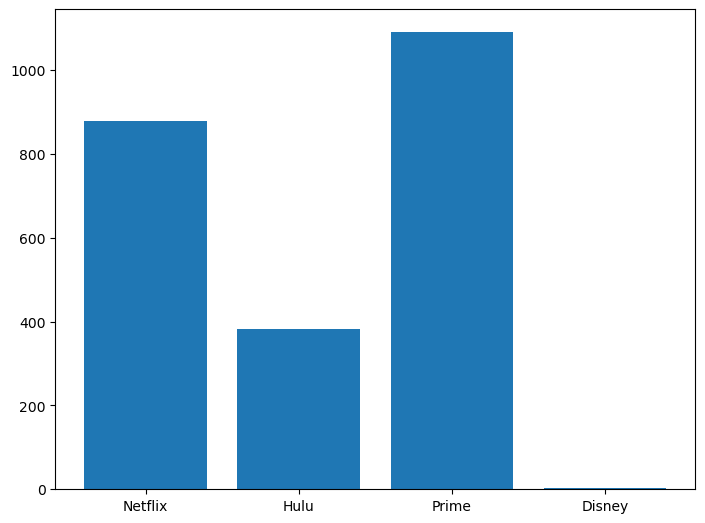

In [28]:
target = '18+'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Service = ['Netflix', 'Hulu', 'Prime', 'Disney']
sums = [len(netflix_age[(netflix_age['Age']== target)]),
        len(Hulu_age[(Hulu_age['Age']== '18+')]),
        len(Prime_age[(Prime_age['Age']== '18+')]),
        len(Disney_age[(Disney_age['Age']== '18+')])]
ax.bar(Service,sums)
plt.show()

Does disney age use different labels?

In [29]:
Disney_age[Disney_age['Age']=='18+']

,Age
4,18+
12,18+
380,18+


No, but we can conclude disney definitely isn't targeting this audience and still has movies in this category

---

### Generalizable Function

In [57]:
def Get_ages_chart(target = '18+'):
    '''
    Gives a bar chart of specified web streaming services and the target age range
    target: the movie rating in age (string)
    '''
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    Service =  ['Netflix', 'Hulu', 'Prime', 'Disney']
    sums = [len(netflix_age[(netflix_age['Age']== target)]),
            len(Hulu_age[(Hulu_age['Age']== target)]),
            len(Prime_age[(Prime_age['Age']== target)]),
            len(Disney_age[(Disney_age['Age']== target)])]
    ax.bar(Service,sums)
    plt.show()

---

### Use the generic function

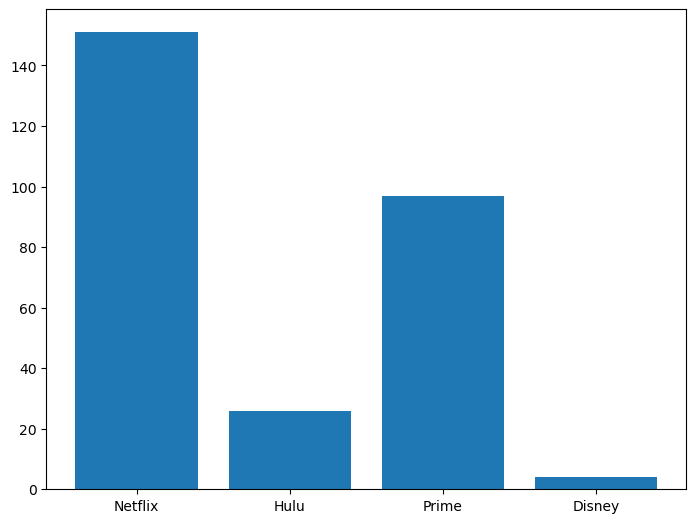

In [65]:
Get_ages_chart(target = '16+')

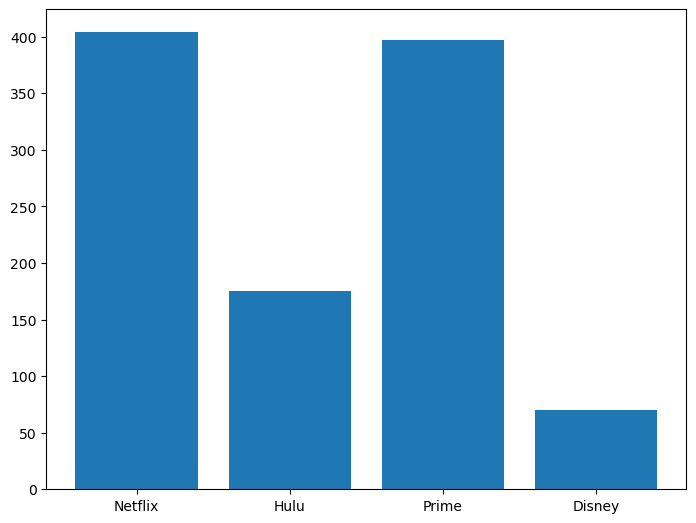

In [66]:
Get_ages_chart(target = '13+')

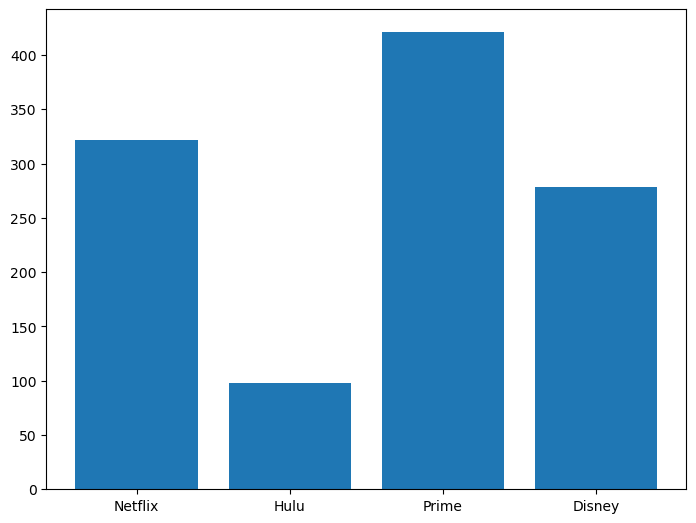

In [67]:
Get_ages_chart(target = '7+')

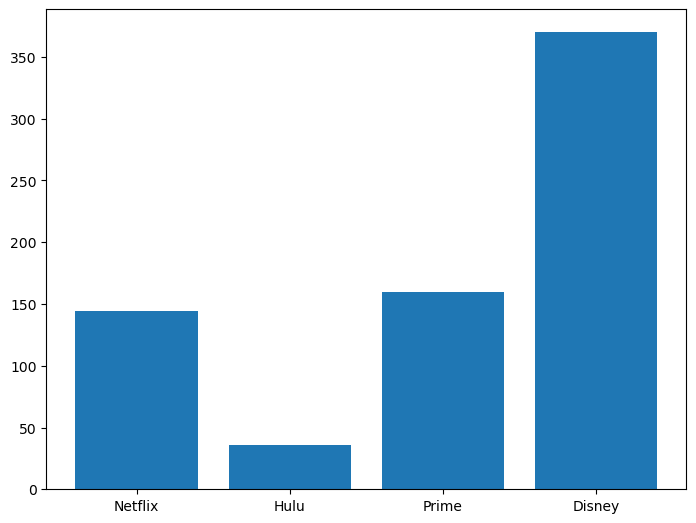

In [69]:
Get_ages_chart(target = 'all')

This may not be the best way to represent the data. What if the amount of movies each streaming service has is different. Hulu is consistently low and it isn't super easy to tell what Hulu's target audience is. We should make these proportions.

---

### Make Generalizable Percent Function

In [29]:
def Get_ages_chart_percent(target = '18+'):
    '''
    Gives a bar chart of specified web streaming services and the target age range.
    This function returns the percent of total movies in that age range.
    target: the movie rating in age (string).
    '''
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    Service =  ['Netflix', 'Hulu', 'Prime', 'Disney']
    sums = [len(netflix_age[(netflix_age['Age']== target)])/len(netflix_age),
            len(Hulu_age[(Hulu_age['Age']== target)])/len(Hulu_age),
            len(Prime_age[(Prime_age['Age']== target)])/len(Prime_age),
            len(Disney_age[(Disney_age['Age']== target)])/len(Disney_age)]
    ax.bar(Service,sums)
    plt.show()

---

### Use Generic Function

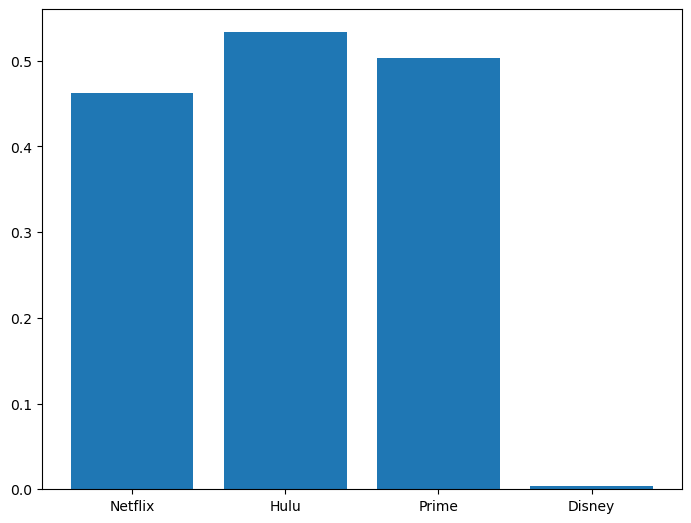

In [74]:
Get_ages_chart_percent(target = '18+')

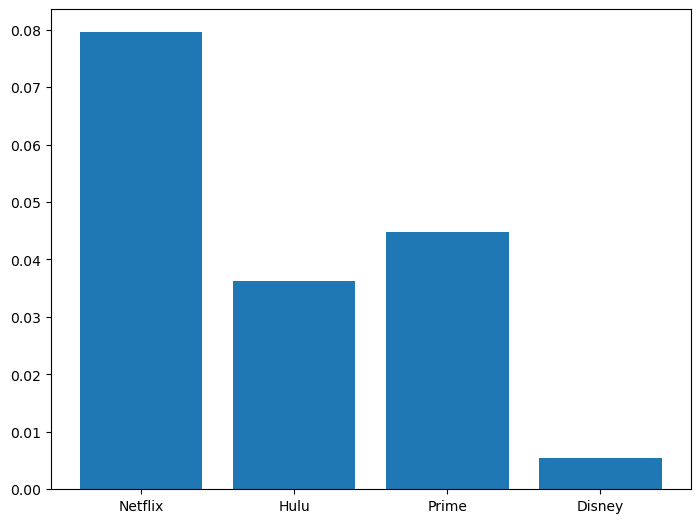

In [75]:
Get_ages_chart_percent(target = '16+')

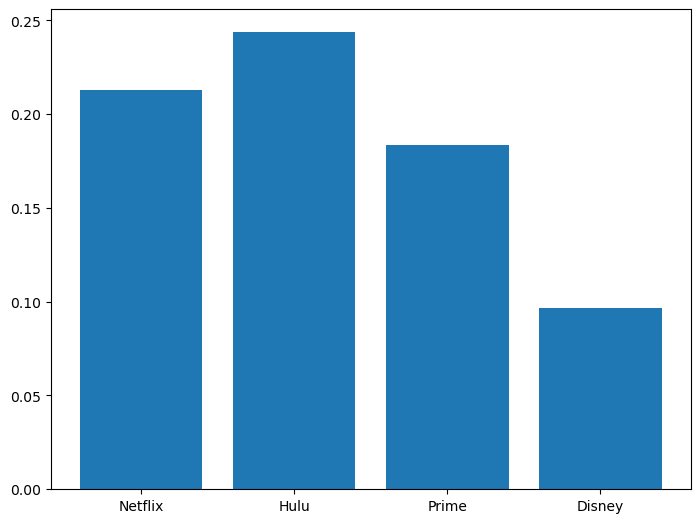

In [76]:
Get_ages_chart_percent(target = '13+')

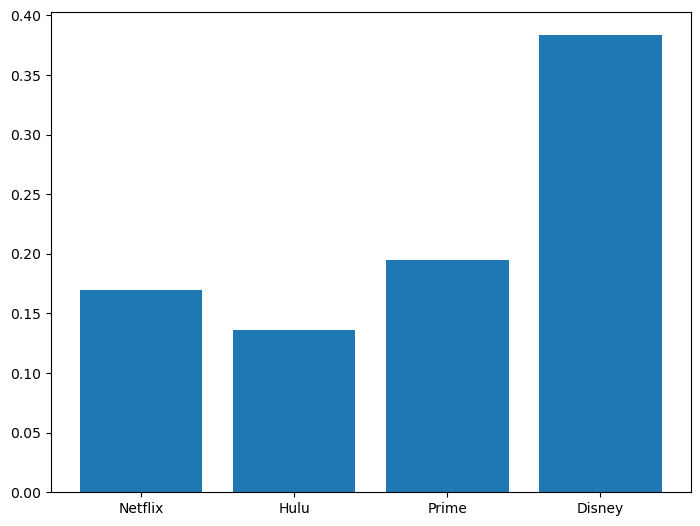

In [77]:
Get_ages_chart_percent(target = '7+')

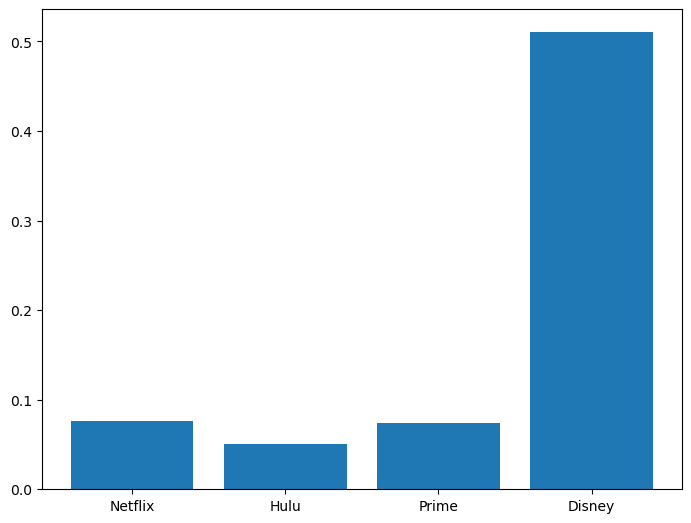

In [78]:
Get_ages_chart_percent(target = 'all')

We can compare the streaming services ages and see who has more availability towards each age groups
 - Disney is targeting kids with their movies
 - Hulu has proportionally more movies available for adults
 - Netflix proportionally has movies rated for teens
 - Prime is proportionally well rounded and has options for everyone

---

### Look at Correlations

In [30]:
corr_matrix = np.corrcoef(money2, rowvar=False)
corr_matrix

array([[ 1.        ,  0.97037948,         nan,         nan,  0.94790188,
        -0.17554939,  0.95456653],
       [ 0.97037948,  1.        ,         nan,         nan,  0.9953177 ,
         0.02257936,  0.98450404],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [ 0.94790188,  0.9953177 ,         nan,         nan,  1.        ,
         0.1113057 ,  0.98538881],
       [-0.17554939,  0.02257936,         nan,         nan,  0.1113057 ,
         1.        ,  0.06621588],
       [ 0.95456653,  0.98450404,         nan,         nan,  0.98538881,
         0.06621588,  1.        ]])

We need a DataFrame without null values

In [79]:
#need to drop nans
money3 = money2.dropna()

In [172]:
corr_matrix = np.corrcoef(money3, rowvar=False)
corr_matrix

array([[1.        , 0.98954369, 0.84315167, 0.96503459, 0.99574417,
        0.91445704, 0.95322664],
       [0.98954369, 1.        , 0.76248365, 0.99268522, 0.99734851,
        0.85014004, 0.94934389],
       [0.84315167, 0.76248365, 1.        , 0.68125132, 0.80540251,
        0.98850112, 0.82399571],
       [0.96503459, 0.99268522, 0.68125132, 1.        , 0.9825344 ,
        0.78173103, 0.93138149],
       [0.99574417, 0.99734851, 0.80540251, 0.9825344 , 1.        ,
        0.88404661, 0.96345499],
       [0.91445704, 0.85014004, 0.98850112, 0.78173103, 0.88404661,
        1.        , 0.88459362],
       [0.95322664, 0.94934389, 0.82399571, 0.93138149, 0.96345499,
        0.88459362, 1.        ]])

---

### Creating Heat Maps

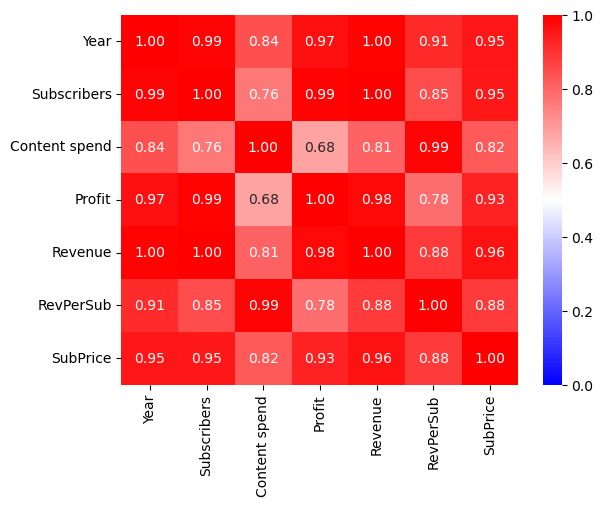

In [106]:
sns.heatmap(
    corr_matrix,
    xticklabels=money3.columns,
    yticklabels=money3.columns,
    vmin=0,
    vmax=1,
    cmap='bwr',
    annot=True,
    fmt='.2f'
)
plt.show()

We can see that everything here is positively correlated. It is hard to differentiate the most correlated from least correlated. Let's change that

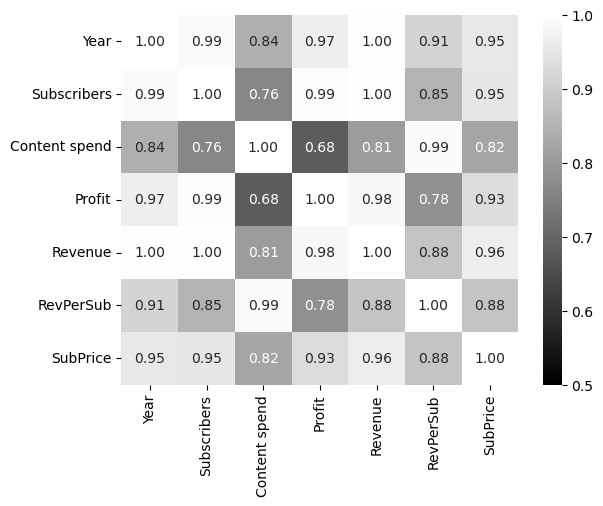

In [176]:
sns.heatmap(
    corr_matrix,
    xticklabels=money3.columns,
    yticklabels=money3.columns,
    vmin=0.5,
    vmax=1,
    cmap = 'gray',
    annot=True,
    fmt='.2f'
)
plt.show()

We can draw some pretty intuitive solutions from this heatmap.

The following are **Very highly** correlated with each other
 - Subscribers
 - Profit
 - Revenue
 - Subprice
 
What is shocking is the correlation between content spend and everything else. There is still a high correlation, but it isn't as large as the others. According to the correlations strictly, it is more profitable to increase subscription price in order to get more revenue. With real world application this likely wouldn't work as you can't raise sibscription price exctensively without some sort of gain to the subcriber. 

---

Lets take a look at how these change over time.

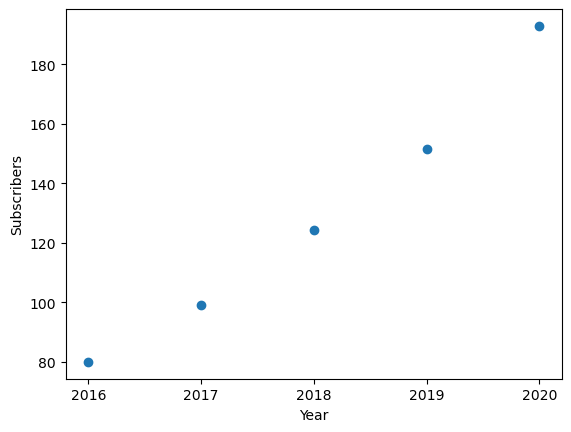

In [41]:
plt.scatter(money3['Year'],money3['Subscribers'])
plt.xlabel("Year")
plt.ylabel("Subscribers")
plt.xticks(np.arange(min(money3['Year']), max(money3['Year'])+1, 1.0))
plt.show()

Let's make a function generalizing this

In [74]:
def makeplot(df,x,y,step_size):
    '''
    Makes a plot with the name of two columns in a dataframe.
    Note that step size is best 
    df: the dataframe where the columns reside
    x: variable to put on x axis
    y: variable to put on y axis
    step_size: x tick marks on the x axis. (this is used to have years in whole numbers)
    '''
    plt.scatter(df[x],df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(np.arange(min(df[x]), max(df[x])+1, step_size))
    plt.show()

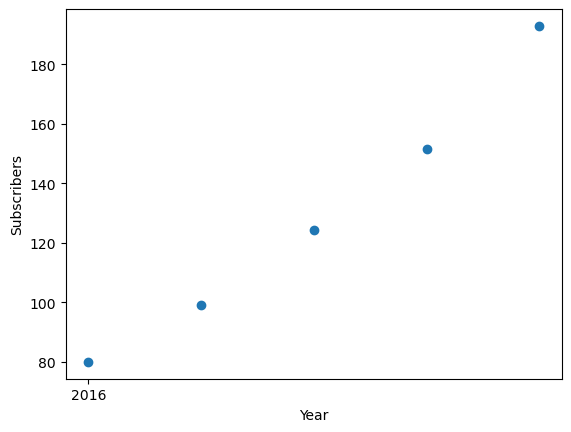

In [69]:
makeplot(money3, 'Year', 'Subscribers',5)

As expected a pretty strong connection in a relatively linear relationship

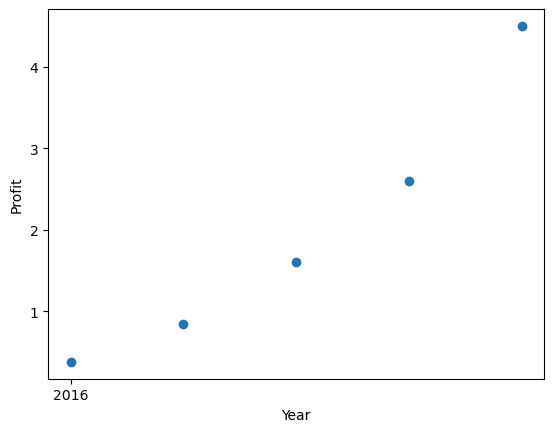

In [70]:
makeplot(money3, 'Year', 'Profit',5)

Same as above, a pretty strong connection in a relatively linear relationship

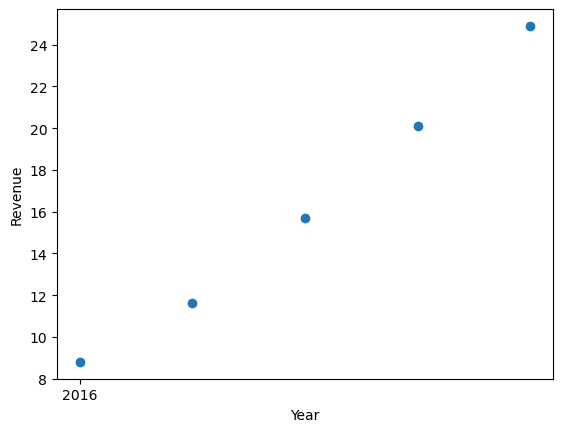

In [71]:
makeplot(money3, 'Year', 'Revenue',5)

Again, a pretty strong connection in a relatively linear relationship

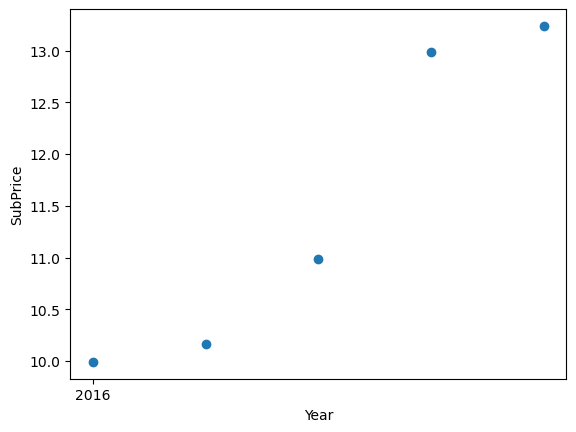

In [72]:
makeplot(money3, 'Year', 'SubPrice',5)

This is where the data gets interesting. Subscription price has stayed the same (relatively) in 2019 and 2020, but profit and revenue has continued going up. Based on our heatmap, subscription price had the highest correlation with our money metrics(profit and revenue), but it tends not to follow the same path. That is the increase in profit in 2019 to 2020 isn't really explained by subscription price. In fact, there was a large increase in subscription price from 2018 to 2019, but no significant change in profit or revenue. 

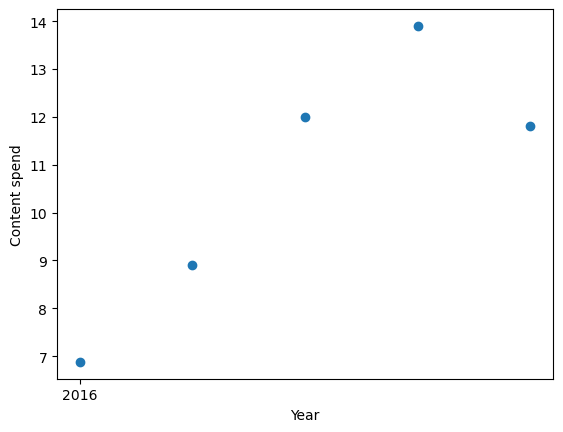

In [73]:
makeplot(money3, 'Year', 'Content spend',5)

This is pretty interesting as well. There was a drop in content spend, but a large increase in profit. This makes sense at first glance, but when looking more into it, you can find a bit of strangeness. Intuitively, spend less money, have more money is pretty obvious and that makes sense to the naked eye. What is weird is that you would expect high content spend to return excellent movies, and these excellent movies lead to more people subscribing to Netflix, and more people subscribing to Netflix leads to more profit. This is however not the case. 

Subscribers also had a linear relationship with time. This means that content spend wasn't the driving force behind the number of people subscribed to Netflix. Number of subscribers might change then due to marketing or some other data source I don't have information to or haven't found yet.

In [280]:
hcontent = [2,2.5,2.5,3.07,3.7]
prime = [2.67,4.5,5.6,7.9,11]

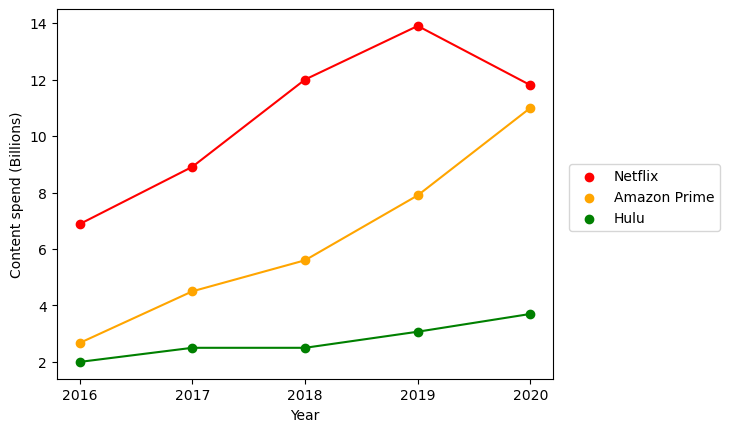

In [87]:
lc = ['red','green','orange']
lm = ['o','o','o']
plt.scatter(money3['Year'],money3['Content spend'], color = 'red')
plt.scatter(money3['Year'],prime, color = 'orange')
plt.scatter(money3['Year'],hcontent, color = 'green')
plt.plot(money3['Year'],money3['Content spend'], color = 'red')
plt.plot(money3['Year'],prime, color = 'orange')
plt.plot(money3['Year'],hcontent, color = 'green')
plt.xlabel('Year')
plt.ylabel('Content spend (Billions)')
plt.xticks([2016,2017,2018,2019,2020])
plt.legend(labels = ['Netflix', 'Amazon Prime', 'Hulu'], bbox_to_anchor = (1.35,.60))
plt.show()

In [279]:
netflix = [((8.91-6.88)/8.91),((12-8.91)/12), ((13.9-12)/12), ((11.8-13.9)/11.8)]
hpct = [((2.5-2)/2.5),0,((3.07-2.5)/3.07),((3.7/3.07)/3.7)]
ppct = [((4.5 - 2.67)/4.5),((5.6-4.5)/5.6),((7.9-5.6)/7.9),((11-7.9)/11)]
year = [2017,2018,2019,2020]

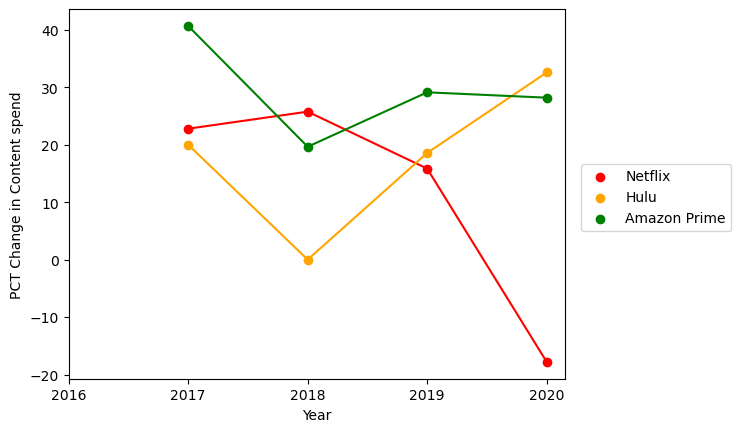

In [198]:
plt.scatter(year,netflix, color = 'red')
plt.scatter(year,hpct, color = 'orange')
plt.scatter(year,ppct, color = 'green')
plt.plot(year,netflix, color = 'red')
plt.plot(year,hpct, color = 'orange')
plt.plot(year,ppct, color = 'green')
plt.xlabel('Year')
plt.ylabel('PCT Change in Content spend')
plt.xticks([2016,2017,2018,2019,2020])
plt.legend(labels = ['Netflix', 'Hulu', 'Amazon Prime'], bbox_to_anchor = (1.35,.60))
plt.show()

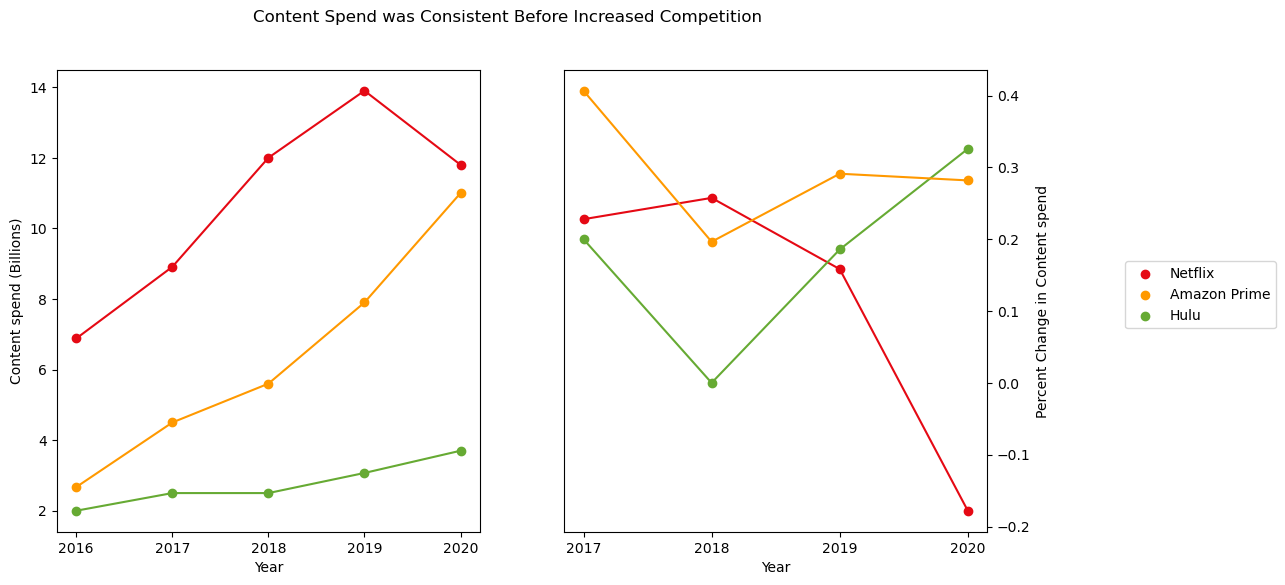

In [281]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.figsize = (12,10)
ax1.scatter(money3['Year'],money3['Content spend'], color = '#E50914')
ax1.scatter(money3['Year'],prime, color = '#FF9900')
ax1.scatter(money3['Year'],hcontent, color = '#66aa33')
ax1.plot(money3['Year'],money3['Content spend'], color = '#E50914')
ax1.plot(money3['Year'],prime, color = '#FF9900')
ax1.plot(money3['Year'],hcontent, color = '#66aa33')
ax1.set_xlabel('Year')
ax1.set_ylabel('Content spend (Billions)')
ax1.set_xticks([2016,2017,2018,2019,2020])

ax = plt.subplot(1,2,2)
plt.scatter(year,netflix, color = '#E50914')
plt.scatter(year,ppct, color = '#FF9900')
plt.scatter(year,hpct, color = '#66aa33' )
plt.plot(year,netflix, color = '#E50914')
plt.plot(year,hpct, color = '#66aa33' )
plt.plot(year,ppct, color = '#FF9900')
plt.xlabel('Year')
plt.ylabel('Percent Change in Content spend')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.xticks([2017,2018,2019,2020])
plt.legend(labels = ['Netflix', 'Amazon Prime', 'Hulu'], bbox_to_anchor = (1.7,.60))
fig.suptitle('Content Spend was Consistent Before Increased Competition')
plt.savefig('Content_spend_before_competition.pdf', bbox_inches='tight')
plt.show()

In [187]:
?plt.ylabel

Signature: plt.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
Docstring:
Set the label for the y-axis.

Parameters
----------
ylabel : str
    The label text.

labelpad : float, default: :rc:`axes.labelpad`
    Spacing in points from the Axes bounding box including ticks
    and tick labels.  If None, the previous value is left as is.

loc : {'bottom', 'center', 'top'}, default: :rc:`yaxis.labellocation`
    The label position. This is a high-level alternative for passing
    parameters *y* and *horizontalalignment*.

Other Parameters
----------------
**kwargs : `.Text` properties
    `.Text` properties control the appearance of the label.

See Also
--------
text : Documents the properties supported by `.Text`.
File:      /opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py
Type:      function


In [188]:
money3

,Year,Subscribers,Content spend,Profit,Revenue,RevPerSub,SubPrice
5,2016,79.9,6.88,0.379,8.8,0.110138,9.99
6,2017,99.0,8.91,0.839,11.6,0.117172,10.16
7,2018,124.3,12.00,1.600,15.7,0.126307,10.99
8,2019,151.5,13.90,2.600,20.1,0.132673,12.99
9,2020,192.9,11.80,4.500,24.9,0.129082,13.24


In [256]:
ttls = [len(netflix_age), len(Hulu_age), len(Prime_age), len(Disney_age)]# get list of total movies
ttls

[1898, 718, 2165, 725]

In [252]:
ls = ['all','7+','13+','16+','18+']
net_pct = []
hulu_pct = []
prime_pct = []
disney_pct = []
for i in ls:
    net_pct.append(len(netflix_age[netflix_age['Age'] == i])/len(netflix_age))
    hulu_pct.append(len(Hulu_age[(Hulu_age['Age']== i)])/len(Hulu_age))
    prime_pct.append(len(Prime_age[(Prime_age['Age']== i)])/len(Prime_age))
    disney_pct.append(len(Disney_age[(Disney_age['Age']== i)])/len(Disney_age))

In [254]:
df = pd.DataFrame([net_pct,hulu_pct,prime_pct,disney_pct])
df = df.rename(columns = {0:'all',1:'7+',2:'13+',3:'16+',4:'18+'})
df

,all,7+,13+,16+,18+
0,0.075869,0.169652,0.212856,0.079557,0.462065
1,0.050139,0.136490,0.243733,0.036212,0.533426
2,0.073903,0.194457,0.183372,0.044804,0.503464
3,0.510345,0.383448,0.096552,0.005517,0.004138


In [55]:
np.median([1,.5])

0.75

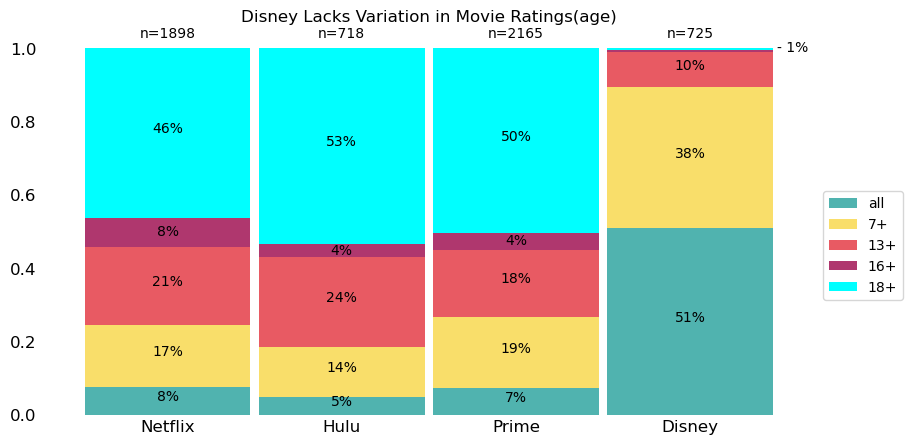

In [277]:
ax = df.plot.bar(color = ['#50B3AF', '#F9DE6A', '#E85A63', '#AF376E', '#00FFFF'],
                    stacked=True,
                    figsize=(10,5),
                    fontsize=12,
                    rot=0,
                    width = .95)
#sum across 
n_per_bar = df.sum(axis=1)
#remove bounding box
[ax.spines[i].set_visible(False) for i in ax.spines]
# Remove the x-axis tick marks
ax.tick_params(axis='x', length=0)
#remove y axis tick marks
ax.tick_params(axis='y', length=0)
#sum up entries per year
n_per_bar = df.sum(axis=1)
# Label the bar totals
for i in range(0,len(df['18+'].unique())):
    plt.text(i, 1.03, 'n=' + str(ttls[i]),
             horizontalalignment='center',
             fontsize=10)
for i in range(0,5):
    for j in range(0,4):
        #using different formulas to find the middle of each stacked bar
        #get percent and plot it at the bottom bar for each year
        if i == 0:
            plt.text(j,df.iloc[j,i]/2,str(round(100* df.iloc[j,i])) + '%', #plot at half the bottom bars height
                    horizontalalignment='center',
                    verticalalignment = 'baseline')
        #get percent and plot it at the middle bar for each year
        if i == 1:
        #or i ==3:
            plt.text(j,(df.iloc[j,i-1] + df.iloc[j,i]/2),str(round(100* df.iloc[j,i])) + '%',#find half the 2nd bar and add it to the upper bound of the 1st bar
                    horizontalalignment='center',
                    verticalalignment = 'baseline')  
        if i ==2:    
            plt.text(j,(df.iloc[j,i-2] + df.iloc[j,i-1] + df.iloc[j,i]/2),str(round(100* df.iloc[j,i])) + '%',#find half the 2nd bar and add it to the upper bound of the 1st bar
                    horizontalalignment='center',
                    verticalalignment = 'baseline')  
        if i ==3:
            if j != 3:
                plt.text(j,(df.iloc[j,i-3] + df.iloc[j,i-2] + df.iloc[j,i-1] + df.iloc[j,i]/2-.01),str(round(100* df.iloc[j,i])) + '%',#find half the 2nd bar and add it to the upper bound of the 1st bar
                        horizontalalignment='center',
                        verticalalignment = 'baseline')
        #get percent and plot it at the top bar for each year
        if i == 4:
            if j != 3:
                plt.text(j,np.median([1, (1 - df.iloc[j,i])]),str(round(100*df.iloc[j,i])) + '%',#find the mean of 100% and the top bound of the 2nd bar
                        horizontalalignment='center',
                        verticalalignment = 'baseline')  

    
plt.annotate('- 1%',(3.5,.99) )   
plt.xticks([0,1,2,3],['Netflix','Hulu','Prime','Disney'])
plt.legend(bbox_to_anchor = (1,.60))
plt.title('Disney Lacks Variation in Movie Ratings(age)')
plt.savefig('Movie_ratings.pdf', bbox_inches='tight')
plt.show()

In [59]:
np.arange(0,4)

array([0, 1, 2, 3])

In [45]:
df = df.rename(columns = {0:'18+',1:'16+',2:'13+',3:'7+',4:'all'})

In [48]:
len(netflix_age)

1898

In [81]:
df

,all,7+,13+,16+,18+
0,0.075869,0.169652,0.212856,0.079557,0.462065
1,0.050139,0.136490,0.243733,0.036212,0.533426
2,0.073903,0.194457,0.183372,0.044804,0.503464
3,0.510345,0.383448,0.096552,0.005517,0.004138


In [192]:
#content spend 2020 - 2022
#talk about the change being made 
year = [2020,2021,2022]
dsny = [22,28,33]
hlu = [2.5,5,9]
amzn = [11,13,15]
ntflx = [11.8,17,18]
hbo = [0,16.7,18]
prime = [11,12,15]
apple = [2.5,4,6.5]
x = pd.DataFrame([year,dsny,hlu,amzn,ntflx,hbo,prime,apple])
x = x.transpose()
x

,0,1,2,3,4,5,6,7
0,2020.0,22.0,2.5,11.0,11.8,NaN,11.0,2.5
1,2021.0,28.0,5.0,13.0,17.0,16.7,12.0,4.0
2,2022.0,33.0,9.0,15.0,18.0,18.0,15.0,6.5


In [275]:
year = [2021,2022]
dsny = [(28-22)/28,(33-28)/28]
hlu = [(5-2.5)/5,(9-5)/9]
amzn = [(13-11)/13,(15-13)/15]
ntflx = [(17-11.8)/11,(18-17)/18]
hbo = [0,(18-16.7)/18]
prime = [(13-11)/13,(15-13)/15]
apple = [(4-2.5)/4,(6.5-4)/5.4]

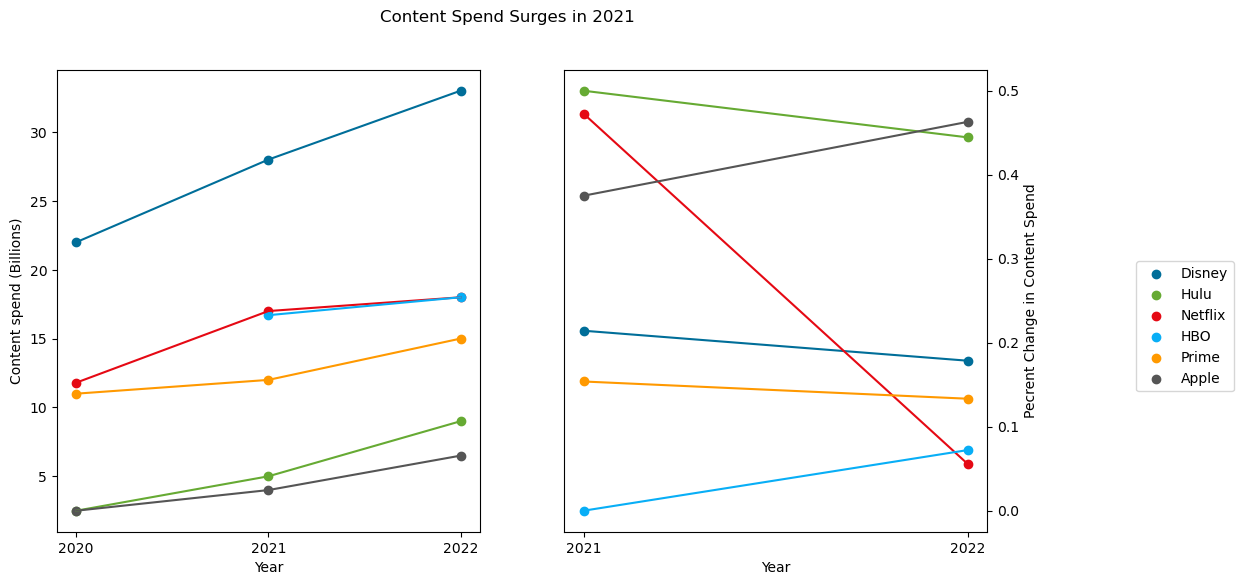

In [276]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(1,2,1)
plt.scatter(x[0],x[1], color = '#006e99') #disney
plt.scatter(x[0],x[2], color = '#66aa33') #hulu
plt.scatter(x[0],x[4], color = '#E50914')#netflix
plt.scatter(x[0],x[5], color = '#08aef6')#hbo
plt.scatter(x[0],x[6], color = '#FF9900')#prime
plt.scatter(x[0],x[7], color = '#555555')#apple
plt.plot(x[0],x[1], color = '#006e99')
plt.plot(x[0],x[2], color = '#66aa33')
plt.plot(x[0],x[4], color = '#E50914')
plt.plot(x[0],x[5], color = '#08aef6')
plt.plot(x[0],x[7], color = '#555555')
plt.plot(x[0],x[6], color = '#FF9900')

plt.xlabel('Year')
plt.ylabel('Content spend (Billions)') 
plt.xticks([2020,2021,2022])

ax2 = fig.add_subplot(1,2,2)
plt.scatter(year,dsny, color = '#006e99') #disney
plt.scatter(year,hlu, color = '#66aa33') #hulu
plt.scatter(year,ntflx, color = '#E50914')#netflix
plt.scatter(year,hbo, color = '#08aef6')#hbo
plt.scatter(year,prime, color = '#FF9900')#prime
plt.scatter(year,apple, color = '#555555')#apple
plt.plot(year,dsny, color = '#006e99')
plt.plot(year,hlu, color = '#66aa33')
plt.plot(year,ntflx, color = '#E50914')
plt.plot(year,hbo, color = '#08aef6')
plt.plot(year,prime, color = '#FF9900')
plt.plot(year,apple, color = '#555555')
plt.xlabel('Year')
plt.ylabel('Pecrent Change in Content Spend') 
plt.xticks([2021,2022])
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

plt.legend(labels = ['Disney', 'Hulu', 'Netflix','HBO','Prime','Apple'], bbox_to_anchor = (1.6,.60))
fig.suptitle('Content Spend Surges in 2021')
plt.savefig('Content_spend_after_competition.pdf', bbox_inches='tight')
plt.show()

Maybe percent increase helps tell the story better. It isn't easy to tell that hulu has doubled its content each year, netflix had a large increase after competitors came in.

In [146]:
###if you could only keep one
# talks about current success after the introduction of media into streaming

services = ['Netflix', 'Hulu', 'HBO', 'Disney', 'Prime', 'Paramount', 'Discovery', 'Peacock', 'Apple', 'Other']
counts = [41,21,13,9,6,2,1,1,1,6]
color = ['#E50914','#66aa33','k','k','#FF9900','k','k','k','k','k']

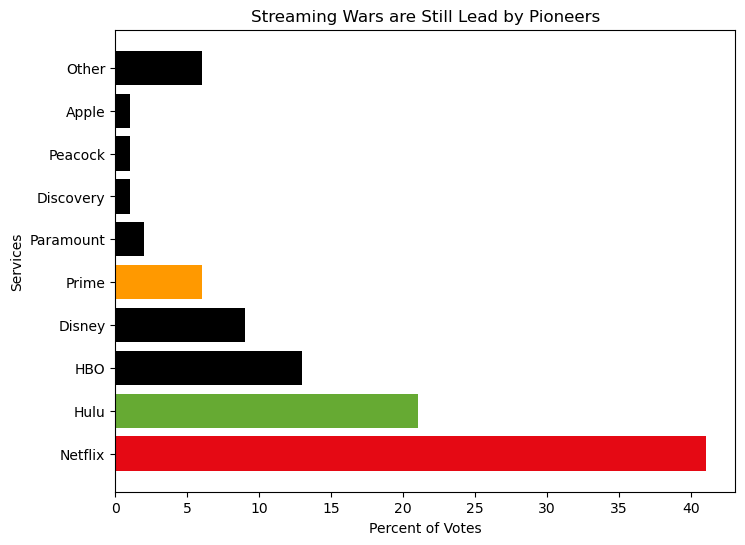

In [273]:
plt.figure(figsize = (8,6))
plt.barh(services,counts, color = color)
plt.xlabel('Percent of Votes')
plt.ylabel('Services') 
plt.title('Streaming Wars are Still Lead by Pioneers')

plt.savefig('Observer_poll.pdf', bbox_inches='tight')
plt.show()

In [ ]:
## Source
#https://observer.com/2021/09/amazon-apple-netflix-disney-hbo-max-streaming-wars/

In [ ]:
#future me
#look at movies data between netflix hulu prime and disney, rotten tomatoes has the rank, graph out who has the most

In [136]:
#movies.to_sql('movies',conn,index = False)
movies = pd.read_sql('''
SELECT *
FROM movies
;''',conn)
movies

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,None,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,None,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,None,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,None,10/100,0,0,0,1,0


In [11]:
movies = movies[movies['Rotten Tomatoes'].notna()]

In [12]:
x = movies[movies['Prime Video'] == 1]
x = x['Rotten Tomatoes']
x

116     82/100
155     80/100
158     80/100
184     79/100
185     79/100
         ...  
8610    13/100
8611    13/100
8612    12/100
8613    12/100
8614    12/100
Name: Rotten Tomatoes, Length: 4113, dtype: object

In [13]:
x = pd.DataFrame(x)
x
x[['num','denom']] = x['Rotten Tomatoes'].str.split('/', expand = True)


In [14]:
numerator = list(x['num'])
denomenator = list(x['denom'])
numerator = [int(x) for x in numerator]
denomenator = [int(x) for x in denomenator]

In [15]:
scores = []
for i in range(len(numerator)):
    scores.append(numerator[i]/denomenator[i])
#scores

In [16]:
def getscore(service):
    movie = movies[movies[service].notna()]
    x = movie[movie[service] == 1]
    x = x['Rotten Tomatoes']
    x = pd.DataFrame(x)
    x[['num','denom']] = x['Rotten Tomatoes'].str.split('/', expand = True)
    numerator = list(x['num'])
    denomenator = list(x['denom'])
    numerator = [int(x) for x in numerator]
    denomenator = [int(x) for x in denomenator]
    scores = []
    for i in range(len(numerator)):
        scores.append(numerator[i]/denomenator[i])
    return pd.DataFrame(scores)

In [28]:
prime = getscore('Prime Video')
prime.columns = ['Prime']

In [27]:
Netflix = getscore('Netflix')
Netflix.columns = ['Netflix']

In [26]:
Hulu = getscore('Hulu')
Hulu.columns = ['Hulu']

In [39]:
Disney = getscore('Disney+')
Disney.columns = ['Disney']
Disney

,Disney
0,0.76
1,0.67
2,0.59
3,0.54
4,0.51
...,...
917,0.14
918,0.13
919,0.13
920,0.10


In [55]:
pd.DataFrame(Disney.values)
hd = Hulu.join(Disney)
nhd = Netflix.join(hd)
rotten = prime.join(nhd)

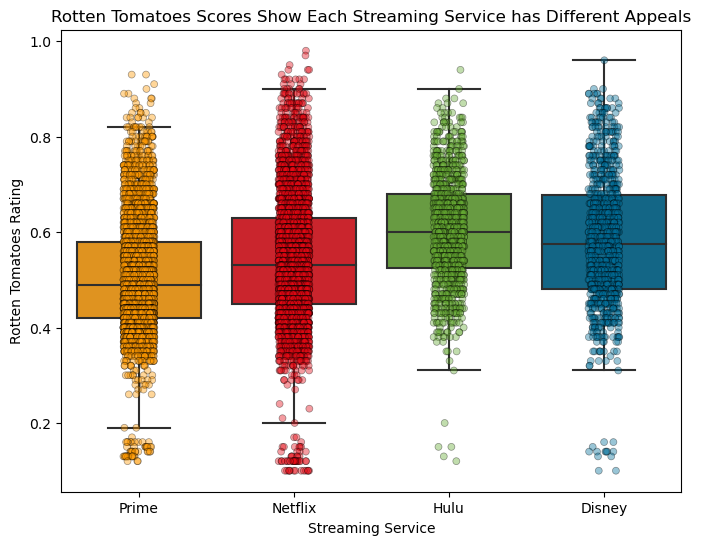

In [272]:
fig,ax = plt.subplots(figsize = (8,6))
pal = ['#FF9900','#E50914','#66aa33','#006e99']
sns.stripplot(data=rotten, jitter=True,
palette=pal,linewidth=.5,edgecolor='k',alpha = 0.4) #low alpha to show congregated data points
sns.boxplot(data=rotten,palette=pal,fliersize=0) #keep everything the same color

#set labels
plt.xlabel('Streaming Service')
plt.ylabel('Rotten Tomatoes Rating')

#set title
plt.title('Rotten Tomatoes Scores Show Each Streaming Service has Different Appeals')

plt.savefig('Rotten_Tomatoes.pdf', bbox_inches='tight')
plt.show()